In [71]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.losses import Huber

<h2>Data Viewing</h2>

In [2]:
data = pd.read_csv('./data/aes_dbaseline_stats.csv')

In [3]:
data.keys()

Index(['IDX', 'IPC', 'CYCLE', 'INSTNUM', 'REGR', 'REGW', 'ROBR', 'ROBW',
       'MEMR', 'MEMW', 'Branches', 'PVF'],
      dtype='object')

<h3>Baseline</h3>

In [30]:
instnum = np.array(data['INSTNUM'])[0: 6400].reshape(-1, 1)
ipc = np.array(data['IPC'])[0: 6400].reshape(-1, 1)
cycle = np.array(data['CYCLE'])[0: 6400].reshape(-1, 1)
regr = np.array(data['REGR'])[0: 6400].reshape(-1, 1)
regw = np.array(data['REGW'])[0: 6400].reshape(-1, 1)
robr = np.array(data['ROBR'])[0: 6400].reshape(-1, 1)
robw = np.array(data['ROBW'])[0: 6400].reshape(-1, 1)
memr = np.array(data['MEMR'])[0: 6400].reshape(-1, 1)
memw = np.array(data['MEMW'])[0: 6400].reshape(-1, 1)
branches = np.array(data['Branches'])[0: 6400].reshape(-1, 1)

pvf = np.array(data['PVF'])[0: 6400].reshape(-1, 1)

In [31]:
features = np.concatenate((instnum, ipc, cycle, regr, regw, robr, robw, memr, memw, branches), axis=1)
target = pvf

In [32]:
features.shape

(6400, 10)

In [33]:
target.shape

(6400, 1)

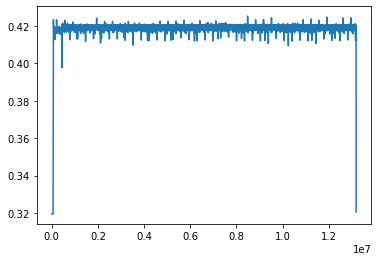

In [9]:
plt.plot(cycle, pvf)

In [91]:
batchSize= 200;
num_batches = features.shape[0] / batchSize

num_train = int(num_batches * 0.8)
num_test = int(num_batches * 0.2)

X_train = features[0: batchSize * num_train]
y_train = target[0: batchSize * num_train]

X_test = features[batchSize * num_train: ]
y_test = target[batchSize * num_train: ]

X_train = np.array(np.split(X_train, batchSize, axis=0))
y_train = np.array(np.split(y_train, batchSize, axis=0))

X_test = np.array(np.split(X_test, batchSize, axis=0))
y_test = np.array(np.split(y_test, batchSize, axis=0))

In [92]:
X_train.shape

(200, 25, 10)

In [93]:
def buildModel(batchSize, featureNum, n_values):
    X_input = Input(shape=(batchSize, featureNum))
    X = BatchNormalization()(X_input)
    
    X = LSTM(units=1, return_sequences=True)(X)
    
    output = Dense(n_values, activation='relu')(X)
    
    model = Model(inputs=X_input, outputs=output)
    
    return model

In [94]:
dlModel = buildModel(batchSize, features.shape[1], 1)

In [95]:
dlModel.compile(optimizer=Adam(lr=1e-4), loss='mse')

In [96]:
hist = dlModel.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
7/7 [==============================] - 1s 79ms/step - loss: 0.1514 - val_loss: 0.1755
Epoch 2/400
7/7 [==============================] - 0s 13ms/step - loss: 0.1506 - val_loss: 0.1748
Epoch 3/400
7/7 [==============================] - 0s 12ms/step - loss: 0.1482 - val_loss: 0.1739
Epoch 4/400
7/7 [==============================] - 0s 13ms/step - loss: 0.1477 - val_loss: 0.1722
Epoch 5/400
7/7 [==============================] - 0s 12ms/step - loss: 0.1479 - val_loss: 0.1698
Epoch 6/400
7/7 [==============================] - 0s 14ms/step - loss: 0.1476 - val_loss: 0.1669
Epoch 7/400
7/7 [==============================] - 0s 13ms/step - loss: 0.1482 - val_loss: 0.1638
Epoch 8/400
7/7 [==============================] - 0s 12ms/step - loss: 0.1469 - val_loss: 0.1604
Epoch 9/400
7/7 [==============================] - 0s 13ms/step - loss: 0.1464 - val_loss: 0.1566
Epoch 10/400
7/7 [==============================] - 0s 13ms/step - loss: 0.1446 - val_loss: 0.1529
Epoch 11/400
7/7 [=

Epoch 77/400
7/7 [==============================] - 0s 14ms/step - loss: 0.0902 - val_loss: 0.0462
Epoch 78/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0911 - val_loss: 0.0454
Epoch 79/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0902 - val_loss: 0.0447
Epoch 80/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0903 - val_loss: 0.0438
Epoch 81/400
7/7 [==============================] - 0s 14ms/step - loss: 0.0887 - val_loss: 0.0430
Epoch 82/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0870 - val_loss: 0.0425
Epoch 83/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0888 - val_loss: 0.0416
Epoch 84/400
7/7 [==============================] - 0s 11ms/step - loss: 0.0864 - val_loss: 0.0409
Epoch 85/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0849 - val_loss: 0.0402
Epoch 86/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0844 - val_loss: 0.0394
Epoch 87/4

7/7 [==============================] - 0s 13ms/step - loss: 0.0203 - val_loss: 0.0191
Epoch 160/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0194 - val_loss: 0.0192
Epoch 161/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0188 - val_loss: 0.0192
Epoch 162/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0167 - val_loss: 0.0190
Epoch 163/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0186 - val_loss: 0.0192
Epoch 164/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0177 - val_loss: 0.0192
Epoch 165/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0186 - val_loss: 0.0191
Epoch 166/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0187 - val_loss: 0.0192
Epoch 167/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0172 - val_loss: 0.0193
Epoch 168/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0149 - val_loss: 0.0194
Epoch 169/400


7/7 [==============================] - 0s 31ms/step - loss: 0.0066 - val_loss: 0.0216
Epoch 242/400
7/7 [==============================] - 1s 98ms/step - loss: 0.0062 - val_loss: 0.0216
Epoch 243/400
7/7 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0216
Epoch 244/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0054 - val_loss: 0.0217
Epoch 245/400
7/7 [==============================] - 0s 11ms/step - loss: 0.0070 - val_loss: 0.0218
Epoch 246/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.0218
Epoch 247/400
7/7 [==============================] - 0s 14ms/step - loss: 0.0060 - val_loss: 0.0218
Epoch 248/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0072 - val_loss: 0.0216
Epoch 249/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0217
Epoch 250/400
7/7 [==============================] - 0s 14ms/step - loss: 0.0056 - val_loss: 0.0217
Epoch 251/400


Epoch 323/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0046 - val_loss: 0.0202
Epoch 324/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0202
Epoch 325/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0200
Epoch 326/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0043 - val_loss: 0.0198
Epoch 327/400
7/7 [==============================] - 0s 11ms/step - loss: 0.0047 - val_loss: 0.0198
Epoch 328/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0196
Epoch 329/400
7/7 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0197
Epoch 330/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0197
Epoch 331/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0197
Epoch 332/400
7/7 [==============================] - 0s 12ms/step - loss: 0.0048 - val_loss: 0.0197


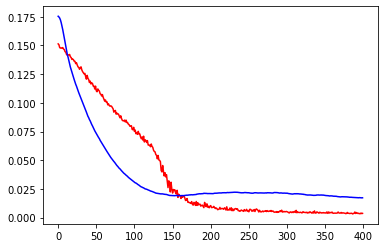

In [97]:
plt.plot(hist.history['loss'], 'red', label='loss')
plt.plot(hist.history['val_loss'], 'blue', label='val_loss')
plt.show()

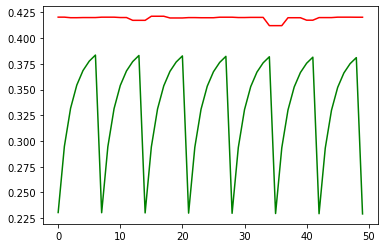

In [98]:
y_predict = dlModel.predict(X_test)
plt.plot(y_test.ravel()[0: 50], 'red')
plt.plot(y_predict.ravel()[0: 50], 'green')